# Study of the results of the VAE for squares and circles

In this notebook we study the results of the VAE trained on the square and circle dataset.
This are the things we do :
   1. We look at the output of the VAE given testing data,
   2. We try to predict one modality (PI or density) given only the other one,
   3. We study the latent distribution
   4. We draw a random $z_{joint}$ and passe it throw the decoder to see the output
   5. We try to go from a circle to a square

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from time import time

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from scipy.stats import multivariate_normal

### We strat by loading the VAE

In [2]:
vae = tf.keras.models.load_model('../Trained_VAE/VAE_full_square_circle/')
vae.summary()

2021-07-28 14:46:57.435667: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-28 14:46:57.491229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-28 14:46:57.491710: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2021-07-28 14:46:57.491758: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-28 14:46:57.492092: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No suc

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_PI (Encoder_PI)      multiple                  250504    
_________________________________________________________________
decoder_PI (Decoder_PI)      multiple                  252800    
_________________________________________________________________
encoder_PC (Encoder_PC)      multiple                  250504    
_________________________________________________________________
decoder_PC (Decoder_PC)      multiple                  252800    
_________________________________________________________________
sampling_11 (Sampling)       multiple                  0         
_________________________________________________________________
decoder_PC (Shared_Decoder)  multiple                  144       
Total params: 1,006,752
Trainable params: 1,006,752
Non-trainable params: 0
_____________________________________________

We then load the data and normalize the inputs

In [3]:
data = np.load('../data/PI_data_square_or_circle.npz')

PC_train = data["data_train"]
PI_train = data["PI_train"]
density_train = data["density_train"]
PC_test = data["data_test"]
PI_test = data["PI_test"]
density_test = data["density_test"]

N_sets_train = PC_train.shape[0]
N_sets_test = PC_test.shape[0]
N_points = PC_train.shape[1]
PI_size = int(np.sqrt(PI_train.shape[1]))
size = int(np.sqrt(density_test.shape[1]))
dim = 2
batch_size = 64

print("N_sets_train : ", N_sets_train)
print("N_sets_test : ", N_sets_test)
print("N_points : ", N_points)
print("PI_size : ", PI_size)
print("Size : ", size)

PI_train /= max(np.max(PI_train), np.max(PI_test))
PI_test /= max(np.max(PI_test), np.max(PI_test))

for i in range(N_sets_train):
    density_train[i] /= np.max(density_train[i])
for i in range(N_sets_test):
    density_test[i] /= np.max(density_test[i])

N_sets_train :  10000
N_sets_test :  200
N_points :  1000
PI_size :  50
Size :  50


### Study of the output given a input the VAE hasn't seen

This are the real point clouds corresponding

In [ ]:
plt.figure(figsize=(2, 4))
plt.subplot(2,1,1)
plt.scatter(PC_train[0,:,0],PC_train[0,:,1])
plt.subplot(2,1,2)
plt.scatter(PC_train[-1,:,0],PC_train[-1,:,1])
plt.axis("equal")
#plt.savefig("../Rapports/Rapport_PRe/Images/VAE_square_circle_true_PC.pdf")

This are the true density and PI associated to the point cloud above

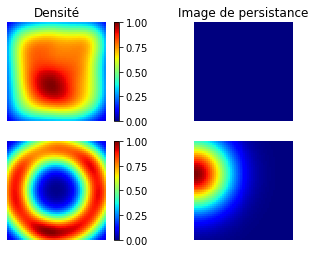

In [24]:
#plt.figure(figsize=(4, 8))
for i in range(2):
    plt.subplot(2, 2, 2*i + 1)
    plt.imshow(np.flip(np.reshape(density_test[-i], [PI_size, PI_size]), 0),
               vmin=0,
               vmax=1,
               cmap='jet')
    plt.colorbar()
    if i == 0:
        plt.title("Densité")
    plt.axis('off')
    plt.subplot(2, 2, 2 * i + 2)
    plt.imshow(np.flip(np.reshape(PI_test[-i], [size, size]), 0), cmap='jet',vmin=0,
               vmax=1)
    #plt.colorbar()
    plt.axis('off')
    if i == 0:
        plt.title("Image de persistance")
plt.savefig("../Rapports/Rapport_PRe/Images/VAE_square_circle_true_PC_PI.pdf")

We give them to the VAE

In [19]:
PI_pred, PC_pred = vae((PI_test, density_test))

2021-07-28 14:53:56.372842: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-28 14:53:56.398788: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2599990000 Hz


This are the output of the VAE

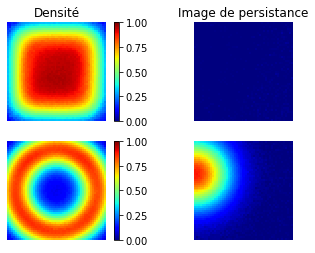

In [25]:
for i in range(2):
    plt.subplot(2, 2, 2*i + 1)
    plt.imshow(np.flip(np.reshape(PC_pred[-i], [PI_size, PI_size]), 0),
               vmin=0,
               vmax=1,
               cmap='jet')
    plt.colorbar()
    if i == 0:
        plt.title("Densité")
    plt.axis('off')
    plt.subplot(2, 2, 2 * i + 2)
    plt.imshow(np.flip(np.reshape(PI_pred[-i], [size, size]), 0), cmap='jet',vmin=0,
               vmax=1)
    #plt.colorbar()
    if i == 0:
        plt.title("Image de persistance")
    plt.axis('off')
plt.savefig("../Rapports/Rapport_PRe/Images/VAE_square_circle_pred_PC_PI.pdf")

### Try to predict a couple of (PI,density) given only one of the two modalities

#### Predict a density from a PI

To do this we give the PIs encoder the PIs

In [57]:
z_mean_PI, z_var_PI = vae.encoder_PI(PI_test)

From the $(\mu_{PI},\sigma_{PI})$ we get from the PIs encoder we can compute $(\mu_{joint},\sigma_{joint})$

In [58]:
mean_joint = (z_mean_PI / z_var_PI) * (1 + 1 / z_var_PI)
var_joint = (1 + 1 / z_var_PI)

We then sample $z_{joint}$ from $\mathcal N(\mu_{joint},\sigma_{joint})$

In [59]:
z_joint = vae.sampling((mean_joint, var_joint))

We can then decode $z_{joint}$ to a couple of (PI,density)

In [60]:
z_PI, z_PC = tf.split(vae.shared_decoder(z_joint),
                      num_or_size_splits=2,
                      axis=1)

reconstructed_PI = vae.decoder_PI(z_PI)
reconstructed_PC = vae.decoder_PC(z_PC)

We can plot them

In [1]:
fig = plt.figure(figsize=(6,8))
for i in range(4):
    plt.subplot(4, 3, 3 * i + 1)
    plt.imshow(np.flip(np.reshape(PI_test[-i], [PI_size, PI_size]),
                       0),
               vmin=0,
               vmax=1,
               cmap='jet')
    #plt.colorbar()
    plt.axis('off')
    if i==0:
        plt.title("Vraies images \n de persistance")
    
    plt.subplot(4, 3, 3 * i + 2)
    plt.imshow(np.flip(np.reshape(reconstructed_PC[-i], [size, size]), 0),
               cmap='jet')
    #plt.colorbar()
    plt.axis('off')
    if i==0:
        plt.title("Densités prédites")
    
    plt.subplot(4, 3, 3 * i + 3)
    plt.imshow(np.flip(np.reshape(reconstructed_PI[-i], [PI_size, PI_size]),
                       0),
               vmin=0,
               vmax=1,
               cmap='jet')
    #plt.colorbar()
    plt.axis('off')
    if i==0:
        plt.title("Images de \n persistance prédites")

#plt.savefig("../Rapports/Rapport_PRe/Images/VAE_square_circle_predict_density_from_PI.pdf")

NameError: name 'plt' is not defined

#### Predict a PI from a density 

Here we do the same thing but with a density at the start : we give the PCs encoder the densities

In [91]:
z_mean_PC, z_var_PC = vae.encoder_PC(density_test)

From the $(\mu_{PC},\sigma_{PC})$ we get from the PCs encoder we can compute $(\mu_{joint},\sigma_{joint})$

In [92]:
mean_joint = (z_mean_PC / z_var_PC) * (1 + 1 / z_var_PC)
var_joint = (1 + 1 / z_var_PC)

We then sample $z_{joint}$ from $\mathcal N(\mu_{joint},\sigma_{joint})$

In [96]:
z_joint = vae.sampling((mean_joint, var_joint))

We can then decode $z_{joint}$ to a couple of (PI,density)

In [97]:
z_PI, z_PC = tf.split(vae.shared_decoder(z_joint),
                      num_or_size_splits=2,
                      axis=1)

reconstructed_PI = vae.decoder_PI(z_PI)
reconstructed_PC = vae.decoder_PC(z_PC)

We can plot them

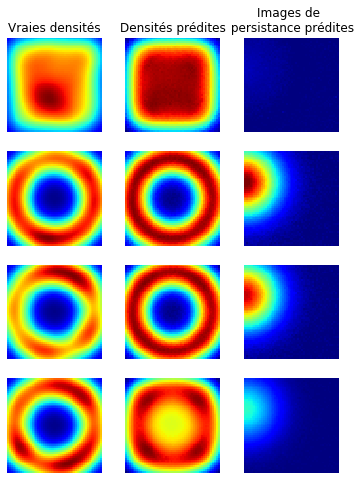

In [98]:
fig = plt.figure(figsize=(6,8))
for i in range(4):
    plt.subplot(4, 3, 3 * i + 1)
    plt.imshow(np.flip(np.reshape(density_test[-i], [PI_size, PI_size]),
                       0),
               vmin=0,
               vmax=1,
               cmap='jet')
    #plt.colorbar()
    plt.axis('off')
    if i==0:
        plt.title("Vraies densités")
    
    plt.subplot(4, 3, 3 * i + 2)
    plt.imshow(np.flip(np.reshape(reconstructed_PC[-i], [size, size]), 0),
               cmap='jet')
    #plt.colorbar()
    plt.axis('off')
    if i==0:
        plt.title("Densités prédites")
    
    plt.subplot(4, 3, 3 * i + 3)
    plt.imshow(np.flip(np.reshape(reconstructed_PI[-i], [PI_size, PI_size]),
                       0),
               vmin=0,
               vmax=1,
               cmap='jet')
    #plt.colorbar()
    plt.axis('off')
    if i==0:
        plt.title("Images de \n persistance prédites")

#plt.savefig("../Rapports/Rapport_PRe/Images/VAE_square_circle_predict_PI_from_density.pdf")

### Study of the latent distribution 

To study the latent distribution we comupte the $(\mu_{joint},\sigma_{joint})$ for the testing data, and we compute the mean of $\mu_{joint}$ and of $\sigma_{joint}$ for the data representing a circle and for the data representing a square. 

We can then encode this into a `multivariate_normal` object and then plot the gaussian in 3D or in 2D.

In [26]:
z_mean_PI, z_var_PI = vae.encoder_PI(PI_test)
z_mean_PC, z_var_PC = vae.encoder_PC(density_test)

mean_joint = (z_mean_PI / z_var_PI +
              z_mean_PC / z_var_PC) * (1 + 1 / z_var_PI + 1 / z_var_PC)
var_joint = (1 + 1 / z_var_PI + 1 / z_var_PC)

In [27]:
M = 100
X, Y = np.meshgrid(np.linspace(-5, 5, M), np.linspace(-5, 5, M))
gauss_1 = multivariate_normal(mean=np.mean(mean_joint[:100], 0),
                              cov=np.mean(var_joint[:100], 0))
gauss_2 = multivariate_normal(mean=np.mean(mean_joint[100:], 0),
                              cov=np.mean(var_joint[100:], 0))
gauss_0_1 = multivariate_normal(mean=[0, 0])

d = np.dstack([X, Y])
# Calculate the two-dimensional joint Gaussian probability
Z_1 = gauss_1.pdf(d).reshape(M, M)
Z_2 = gauss_2.pdf(d).reshape(M, M)
Z_0_1 = gauss_0_1.pdf(d).reshape(M, M)

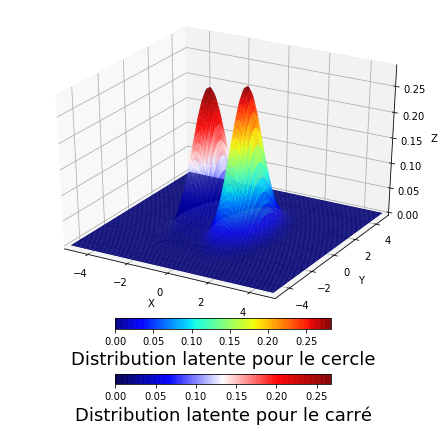

In [41]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
carre = ax.plot_surface(X,
                        Y,
                        Z_1,
                        rstride=1,
                        cstride=1,
                        alpha=0.8,
                        cmap='seismic')
cercle = ax.plot_surface(X,
                         Y,
                         Z_2,
                         rstride=1,
                         cstride=1,
                         alpha=0.8,
                         cmap='jet')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

cbar1 = plt.colorbar(carre, location='bottom', shrink=0.5, pad=0.001)
cbar2 = plt.colorbar(cercle,
                     label='Distribution latente pour le cercle',
                     location='bottom',
                     shrink=0.5,
                     pad=0.001)
cbar1.set_label('Distribution latente pour le carré', size=18)
cbar2.set_label('Distribution latente pour le cercle', size=18)

#plt.title('Représentation 3D de la distribution latente',size=18)
plt.show()

#fig.savefig("../Rapports/Rapport_PRe/Images/VAE_full_square_circle_distributions_3D_fr.pdf")

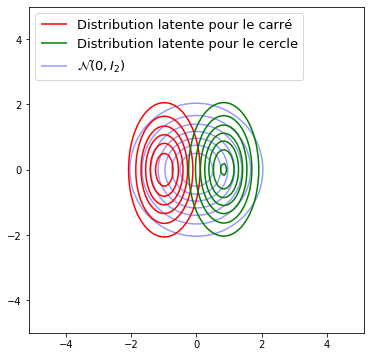

In [42]:
from matplotlib import cm
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.plot_surface(X, Y, Z_1, rstride=3, cstride=3, linewidth=1, antialiased=True,
#                cmap=cm.viridis)
fig = plt.figure(figsize=(6,6))
n_0_1 = plt.contour(X, Y, Z_0_1, colors='blue', alpha=0.4)
square = plt.contour(X, Y, Z_1, colors='red', alpha=1)
circle = plt.contour(X, Y, Z_2, colors='green', alpha=1)
h1, _ = square.legend_elements()
h2, _ = circle.legend_elements()
h3, _ = n_0_1.legend_elements()

plt.legend([h1[0], h2[0], h3[0]], [
    "Distribution latente pour le carré", "Distribution latente pour le cercle",
    "$\mathcal{N}(0,I_2)$"
],
           #bbox_to_anchor=(1, 1),
           loc='upper left',
           prop={'size': 13})

plt.axis('equal')
#plt.title('Représentation 3D de la distribution latente',size=18)
#plt.savefig("../Rapports/Rapport_PRe/Images/VAE_full_square_circle_distributions_2D_fr.pdf")

### Generate random $z_{joint}$

We try to generate a random $z_{joint}$ from $\mathcal N(0,1)$. We then decode this random $z_{joint}$ and plot the PI and density we get from it.

In [118]:
z_joint = np.random.normal(size=(4,2))
z_PI, z_PC = tf.split(vae.shared_decoder(z_joint),
                      num_or_size_splits=2,
                      axis=1)

reconstructed_PI = vae.decoder_PI(z_PI)
reconstructed_PC = vae.decoder_PC(z_PC)

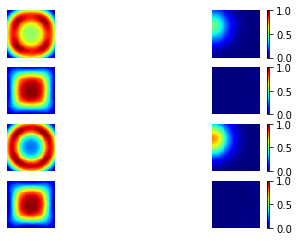

In [119]:
for i in range(4):
    plt.subplot(4, 2, 2 * i + 2)
    plt.imshow(np.flip(np.reshape(reconstructed_PI[-i], [PI_size, PI_size]),
                       0),
               vmin=0,
               vmax=1,
               cmap='jet')
    plt.colorbar()
    plt.axis('off')
    plt.subplot(4, 2, 2 * i + 1)
    plt.imshow(np.flip(np.reshape(reconstructed_PC[-i], [size, size]), 0),
               cmap='jet')
    #plt.colorbar()
    plt.axis('off')

### Go from a square to a circle 

To go from a square to a circle, we arrange 7 $z_{joint}$ from $(-2,0)$ (representing a square) to $(2,0)$ representing a circle. We can then decode those $z_{joint}$ and plot the output.

In [3]:
PI_size=50
size=50

In [4]:
z_joint = np.stack((np.transpose(np.linspace(-2,2,7)),np.zeros((7,))),1)

In [6]:
z_PI, z_PC = tf.split(vae.shared_decoder(z_joint),
                      num_or_size_splits=2,
                      axis=1)

reconstructed_PI = vae.decoder_PI(z_PI)
reconstructed_PC = vae.decoder_PC(z_PC)

2021-07-28 09:53:03.416830: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-28 09:53:03.417998: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2599990000 Hz


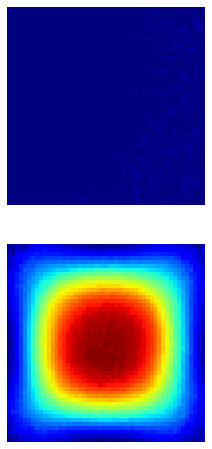

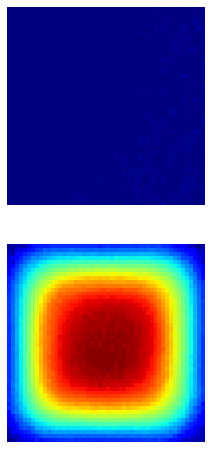

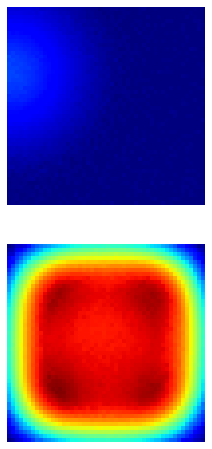

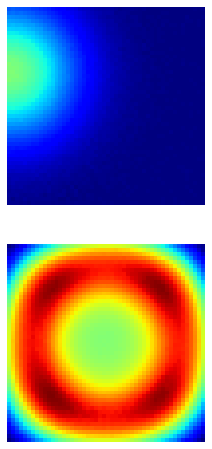

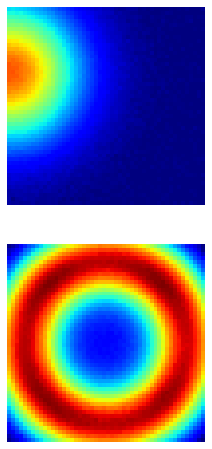

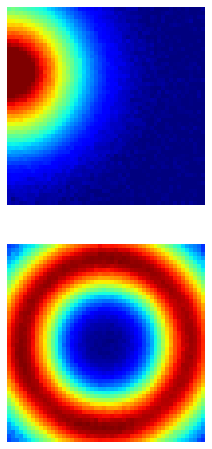

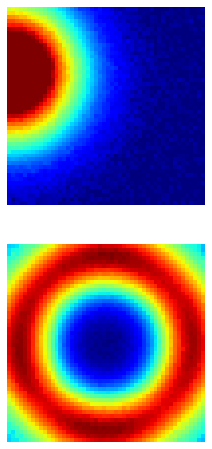

In [7]:
for i in range(7):
    plt.figure(figsize=(4, 8))
    plt.subplot(2,1,1)
    plt.imshow(np.flip(np.reshape(reconstructed_PI[i], [PI_size, PI_size]),
                       0),
               vmin=0,
               vmax=1,
               cmap='jet',aspect='equal')
    #plt.colorbar()
    plt.axis('off')
    plt.subplot(2, 1, 2)
    plt.imshow(np.flip(np.reshape(reconstructed_PC[i], [size, size]), 0),
               cmap='jet',aspect='equal')
    #plt.colorbar()
    plt.axis('off')
    #plt.savefig("Résultats/from_square_to_circle_"+str(i)+".png")